# Clustering

In this notebook clustering is being applied to the correlation dataframe in order to group countries by similarity. The analysis will be performed for the different dimensions of the indicators: equality, socio-demographic and economic. In the end there is a global analysis  using all the indicators and giving a final conclusion to this notebook.

In first place, set the list of indicators depending of the area they represent.

In [1]:
economic_ind = ['CreditToAgriFishForest', 'AgriShareGDP', 'EmploymentRural', '%EmploymentAgriFishForest', 'TotalAgri', '% Soldiers', '% Healthcare Investment', '% Employment Industry', '% Education Expenditure']
soc_dem_ind = ['Marriage Rate', 'Birth Rate', 'Death Rate', 'Homicides', 'Life Expectancy', 'Maternal Death Risk', 'Literacy Rate', 'Infant Mortality', '% Population Growth', '% Rural Population', 'Suicide Rate', 'Population']
equality_ind = ['Gender Equality', 'Gender Inequality','% Men Employment', '% Women Employment', 'Women Schooling Years', 'Men Schooling Years', 'Freedom of Expression', '% Undernourishment', 'Civil Liberties', 'Gini']

### Import

Import all the libraries and the correlation dataframe generated in the Notebook-Golden.

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from numpy import sort
from sklearn.manifold import TSNE
import ipywidgets as widgets
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from matplotlib import gridspec
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.cluster import AffinityPropagation
from ipywidgets import interact, interact_manual
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
write_path = os.getcwd() + '/Output'
corr_df = pd.read_csv(write_path + '/Corr_DF_pearson.csv')
corr_df.rename(columns = {'Unnamed: 0' : 'Country'}, inplace = True)
corr_df.set_index(corr_df.columns[0], inplace=True)


# Equality indicators

Apply the drop columns method to discard indicators which won't be analyzed and fill NaN values with 0. 

In this codeblock use the main piece of the Notebook, the algorithm of t-SNE (t-Distributed Stochastic Neighbor Embedding) to reduce the dimensionality of all the indicators to only 2 components. 
- N-components: the dimensions to analyze.
- Perplexity: measurement of how well a probability distribution or probability model predicts a sample.
- N-iter: iterations for the optimization
- Learning rate: how fast the algorithm learns. A high value may cause a ball form of the data.
- Init: Initialization of embedding. 'pca' is the new default for newer versions.

The output is a dataframe of all the countries with only 2 columns representing the condensed indicators.

In [3]:
df_normalized = corr_df.copy()
df_normalized.drop(df_normalized.columns.difference(equality_ind), 1, inplace=True)
df_normalized = df_normalized.dropna(how='all')
df_normalized = df_normalized.fillna(value = 0)
tsne = TSNE(n_components = 2, perplexity = 5, n_iter = 20000, learning_rate = 100.0, init = 'pca')
tsne_result = tsne.fit_transform(df_normalized)
new_df_tsne = pd.DataFrame(np.hstack((np.array(df_normalized.index).reshape(-1, 1), tsne_result)), columns = ['Country', '1st_component', '2nd_component'])
new_df_tsne.set_index('Country', inplace = True)
print(new_df_tsne)

             1st_component 2nd_component
Country                                 
Argentina         0.004769     28.372192
Barbados         24.611437     22.477417
Azerbaijan       -3.800133     30.059706
Burkina Faso    -20.327116     67.829842
Sierra Leone    -20.714712    -38.174812
...                    ...           ...
Maldives        -15.489695     62.650936
Mauritius       -22.215483     69.383591
Guyana          -57.253815      0.871426
Kenya           -26.436104    -36.817009
Poland           30.870569    -24.334475

[122 rows x 2 columns]


## Clustering

The clustering method used in the notebook is Affinity Propagation. The reason behind  choosing this one is because is for many clusters, uneven cluster size and can simply be optmized changing 1 parameter, "damping". 

Damping: is the extent to which the current value is maintained relative to incoming values (weighted 1 - damping).
In the end it generates a scatter plot with the result, however, this graphic is not flexible and powerful enough to display all the features desired. 

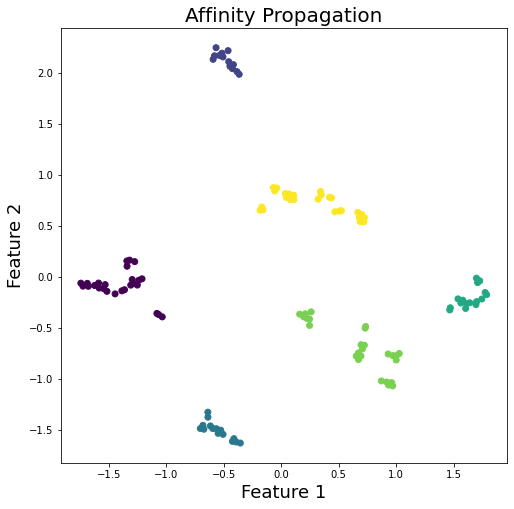

In [4]:
X_affinity_equality = pd.DataFrame(StandardScaler().fit_transform(new_df_tsne))
X_affinity_equality.index = new_df_tsne.index
'''Apply AffinityPropagation'''
optics = AffinityPropagation(damping=0.5).fit(X_affinity_equality)
labels_affinity = optics.labels_

plt.figure(figsize=(8,8))
plt.title('Affinity Propagation',fontsize= 20)
plt.xlabel('Feature 1',fontsize= 18)
plt.ylabel('Feature 2',fontsize= 18)
fig = plt.scatter(X_affinity_equality[0], X_affinity_equality[1], c= labels_affinity)

### Results
Using the px.scatter gives the possibility to display the clustering with labels and in an interactive format.

In [5]:
X_affinity_equality['Cluster'] = labels_affinity
X_affinity_equality['Cluster'] = X_affinity_equality['Cluster'].astype(str)
 
fig = px.scatter(X_affinity_equality, x= X_affinity_equality.columns[0], y=X_affinity_equality.columns[1], text= X_affinity_equality.index, size_max=100, color='Cluster', category_orders={"Cluster": sort(list(set(X_affinity_equality.loc[:, 'Cluster'])))})
fig.update_layout(title_text='Cluster Equality Indicators', title_x=0.5)
fig.update_traces(textposition='top center')
fig.show()


# Socio-demographic indicators

Perform the same code as before but for different indicators.

TSNE() and AffinityPropagation() parameters have been optimized again for this case.

In [6]:
#Reload the oringinal dataframe, now only with socio-demographic indicators
df_normalized = corr_df.copy()
df_normalized.drop(df_normalized.columns.difference(soc_dem_ind), 1, inplace=True)
df_normalized = df_normalized.dropna(how='all')
df_normalized = df_normalized.fillna(value = 0)

#Apply t-SNE
tsne = TSNE(n_components = 2, perplexity = 5, n_iter = 20000, learning_rate = 100.0, init = 'pca')
tsne_result = tsne.fit_transform(df_normalized)
new_df_tsne = pd.DataFrame(np.hstack((np.array(df_normalized.index).reshape(-1, 1), tsne_result)), columns = ['Country', '1st_component', '2nd_component'])
new_df_tsne.set_index('Country', inplace = True)

#Apply Clustering
X_affinity_socdem = pd.DataFrame(StandardScaler().fit_transform(new_df_tsne))
X_affinity_socdem.index = new_df_tsne.index
'''Apply AffinityPropagation'''
optics = AffinityPropagation(damping=0.5).fit(X_affinity_socdem)
labels_affinity = optics.labels_

#Display plot
X_affinity_socdem['Cluster'] = labels_affinity
X_affinity_socdem['Cluster'] = X_affinity_socdem['Cluster'].astype(str)
fig = px.scatter(X_affinity_socdem, x= X_affinity_socdem.columns[0], y=X_affinity_socdem.columns[1], text= X_affinity_socdem.index, size_max=100, color='Cluster', category_orders={"Cluster": sort(list(set(X_affinity_socdem.loc[:, 'Cluster'])))})
fig.update_layout(title_text='Cluster Socio-demographic Indicators', title_x=0.5)
fig.update_traces(textposition='top center')
fig.show()

# Economic indicators

Perform the same code as before but for different indicators.

TSNE() and AffinityPropagation() parameters have been optimized again for this case.

In [7]:
#Reload the oringinal dataframe, now only with economic indicators
df_normalized = corr_df.copy()
df_normalized.drop(df_normalized.columns.difference(economic_ind), 1, inplace=True)
df_normalized = df_normalized.dropna(how='all')
df_normalized = df_normalized.fillna(value = 0)

#Apply t-SNE
tsne = TSNE(n_components = 2, perplexity = 5, n_iter = 20000, learning_rate = 100.0, init = 'pca')
tsne_result = tsne.fit_transform(df_normalized)
new_df_tsne = pd.DataFrame(np.hstack((np.array(df_normalized.index).reshape(-1, 1), tsne_result)), columns = ['Country', '1st_component', '2nd_component'])
new_df_tsne.set_index('Country', inplace = True)

#Apply Clustering
X_affinity_economic = pd.DataFrame(StandardScaler().fit_transform(new_df_tsne))
X_affinity_economic.index = new_df_tsne.index
'''Apply AffinityPropagation'''
optics = AffinityPropagation(damping=0.9).fit(X_affinity_economic)
labels_affinity = optics.labels_

#Display plot
X_affinity_economic['Cluster'] = labels_affinity
X_affinity_economic['Cluster'] = X_affinity_economic['Cluster'].astype(str)
fig = px.scatter(X_affinity_economic, x= X_affinity_economic.columns[0], y=X_affinity_economic.columns[1], text= X_affinity_economic.index, size_max=100, color='Cluster', category_orders={"Cluster": sort(list(set(X_affinity_economic.loc[:, 'Cluster'])))})
fig.update_layout(title_text='Cluster Economic Indicators', title_x=0.5)
fig.update_traces(textposition='top center')
fig.show()

# All indicators

Perform the same code as before but for different indicators.

TSNE() and AffinityPropagation() parameters have been optimized again for this case.

In [8]:
#Reload the oringinal dataframe, now with all  indicators
df_normalized = corr_df.copy()
df_normalized = df_normalized.dropna(how='all')
df_normalized = df_normalized.fillna(value = 0)

#Apply t-SNE
tsne = TSNE(n_components = 2, perplexity = 5, n_iter = 20000, learning_rate = 100.0, init = 'pca')
tsne_result = tsne.fit_transform(df_normalized)
new_df_tsne = pd.DataFrame(np.hstack((np.array(df_normalized.index).reshape(-1, 1), tsne_result)), columns = ['Country', '1st_component', '2nd_component'])
new_df_tsne.set_index('Country', inplace = True)

#Apply Clustering
X_affinity_all = pd.DataFrame(StandardScaler().fit_transform(new_df_tsne))
X_affinity_all.index = new_df_tsne.index
'''Apply AffinityPropagation'''
optics = AffinityPropagation(damping=0.9).fit(X_affinity_all)
labels_affinity = optics.labels_

#Display plot
X_affinity_all['Cluster'] = labels_affinity
X_affinity_all['Cluster'] = X_affinity_all['Cluster'].astype(str)
fig = px.scatter(X_affinity_all, x= X_affinity_all.columns[0], y=X_affinity_all.columns[1], text= X_affinity_all.index, size_max=100, color='Cluster', category_orders={"Cluster": sort(list(set(X_affinity_all.loc[:, 'Cluster'])))})
fig.update_layout(title_text='Cluster All Indicators', title_x=0.5)
fig.update_traces(textposition='top center')
fig.show()

## Widget Clustering

In the table below

In [9]:
df_dict = {'Equality indicators': X_affinity_equality, 'Socio-demographic': X_affinity_socdem, 'Economic indicators': X_affinity_economic, 'All indicators': X_affinity_all}

def tableOut(Type, Country, Output = False):
    try:
        df = pd.DataFrame()

        #Search for the countries in the same cluster
        cluster_number = df_dict[Type].loc[df_dict[Type].index == Country]['Cluster'].item()
        df = pd.concat([df, pd.DataFrame(df_dict[Type].loc[df_dict[Type]['Cluster'] == cluster_number].index.tolist())], axis = 1, ignore_index=True)
        
        #Drop the same country name, fill nans and rename column
        df.drop(df[df[0] == Country].index, inplace = True)
        df.rename(columns={0:Type}, inplace  = True)
        
        #Output return to use tha same method for other codeblocks.
        if Output:
            #print(list(df[df.columns[0]]))
            return list(df[df.columns[0]])
    except Exception:
        print(Exception)
        return ['No data']

    display(df)




@interact(
    Type = df_dict.keys(),
    Country = sort(corr_df.index.tolist()))

def g(Type = 'Equality indicators', Country = 'Afghanistan'):
    return tableOut(Type, Country)

interactive(children=(Dropdown(description='Type', options=('Equality indicators', 'Socio-demographic', 'Econo…

interactive(children=(Dropdown(description='Country', index=136, options=('Afghanistan', 'Albania', 'Algeria',…

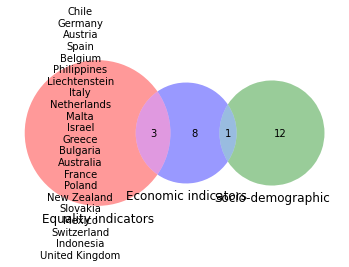

In [10]:
def VennOut(Country):

    set1 = set(tableOut('Equality indicators', Country, True))
    set2 = set(tableOut('Socio-demographic', Country, True))
    set3 = set(tableOut('Economic indicators', Country, True))

    print(set1)
    print(set2)
    print(set3)


    venn = venn3([set1, set2, set3], ('Equality indicators', 'Socio-demographic', 'Economic indicators'))

    
    venn.get_label_by_id('100').set_text('\n'.join(set1-set2-set3))
    venn.get_label_by_id('110').set_text('\n'.join(set1&set2-set3))
    venn.get_label_by_id('010').set_text('\n'.join(set2-set3-set1))
    venn.get_label_by_id('101').set_text('\n'.join(set1&set3-set2))
    venn.get_label_by_id('111').set_text('\n'.join(set1&set2&set3))
    venn.get_label_by_id('011').set_text('\n'.join(set2&set3-set1))
    venn.get_label_by_id('001').set_text('\n'.join(set3-set2-set1))



    plt.show()


@interact(
    Country = sort(corr_df.index.tolist()))

def g(Country = 'Spain'):
    return VennOut(Country)

In [ ]:
X_affinity_socdem.loc[X_affinity_socdem.index == 'Andorra']

,0,1,Cluster
Country,,,
Andorra,1.273897,-0.581513,7


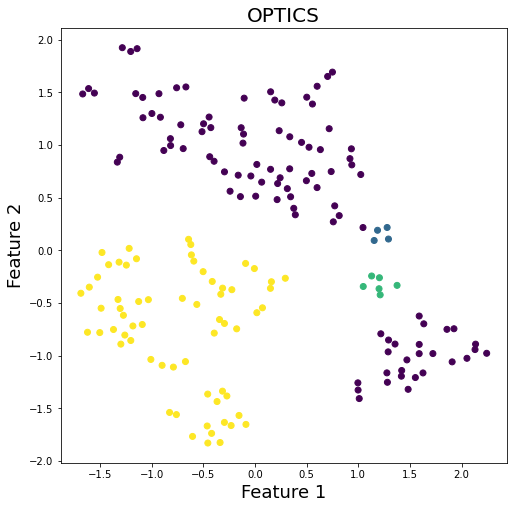

In [ ]:

X_optics = pd.DataFrame(StandardScaler().fit_transform(new_df_tsne))

'''Apply OPTICS'''
optics = OPTICS(xi=.35, min_cluster_size=3, min_samples=5).fit_predict(X_optics)
#labels_optics = optics.labels_

plt.figure(figsize=(8,8))
plt.title('OPTICS',fontsize= 20)
plt.xlabel('Feature 1',fontsize= 18)
plt.ylabel('Feature 2',fontsize= 18)
fig = plt.scatter(X_optics[0], X_optics[1], c= optics)


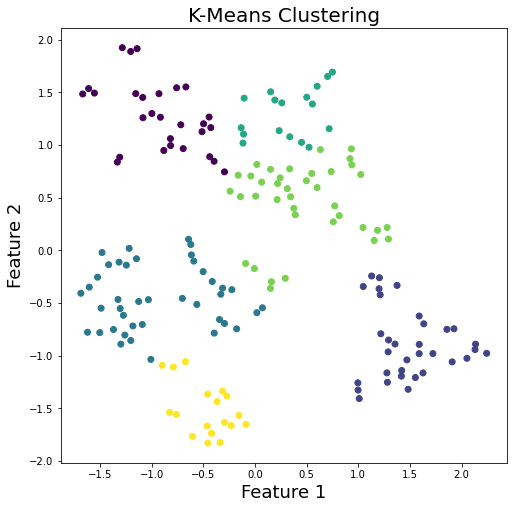

In [ ]:

X_kmeans = pd.DataFrame(StandardScaler().fit_transform(new_df_tsne))
X_kmeans.index = new_df_tsne.index
'''Apply K-Means'''
from sklearn.cluster import *
from sklearn.mixture import GaussianMixture


kmean_clusters =   MiniBatchKMeans(n_clusters=6).fit_predict(X_kmeans)

plt.figure(figsize = (8,8))
plt.title('K-Means Clustering',fontsize= 20)
plt.xlabel('Feature 1', fontsize=18)
plt.ylabel('Feature 2', fontsize=18)
f = plt.scatter(X_kmeans[0],X_kmeans[1],c=kmean_clusters)

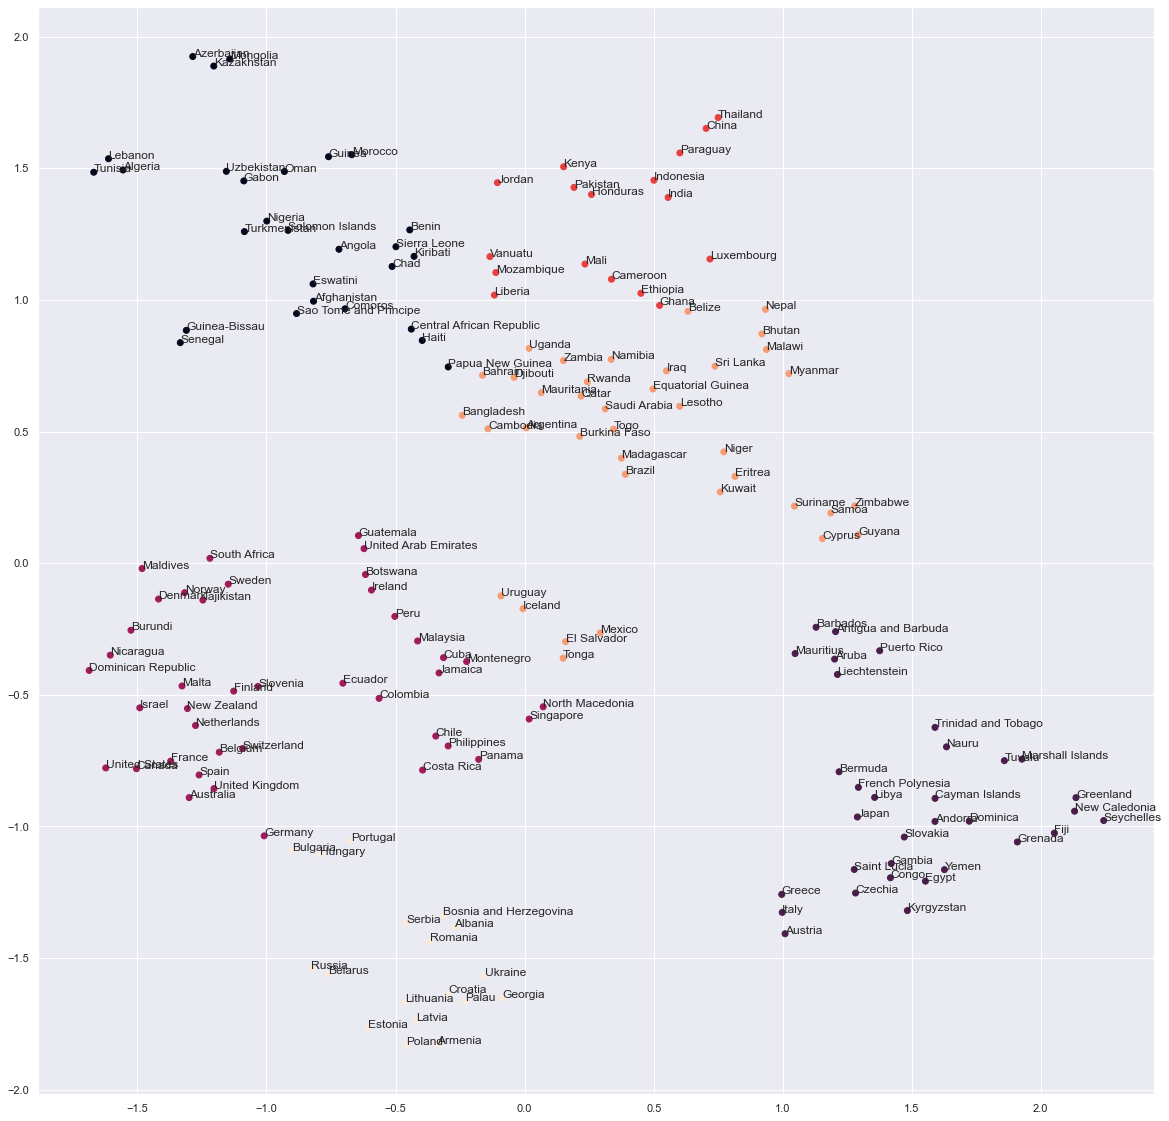

In [ ]:
sns.set(rc={'figure.figsize':(20, 20)})


z = X_kmeans[0]
y = X_kmeans[1]
n = new_df_tsne.index.get_level_values(0)
fig, ax = plt.subplots()

ax.scatter(z, y, c=kmean_clusters)



for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

In [ ]:
""" new_df_tsne['Cluster'] = kmean_clusters.tolist()
new_df_tsne """

" new_df_tsne['Cluster'] = kmean_clusters.tolist()\nnew_df_tsne "

In [ ]:

new_df_tsne.to_csv(write_path + '/Cluster.csv')